# Семинар 1
## Первичный анализ данных  и EDA (Exploratory Data Analysis)

### План занятия:
1. Что такое EDA и из чего он состоит 
2. Практика на реальном датасете:
    - Загрузка датасета
    - Первичный анализ, очистка
    - Визуализация фичей и поиск зависимостей
    - Выводы

## **EDA** - разведочный анализ данных

Место EDA в процессе анализа данных:  

![eda.png](https://waksoft.susu.ru/wp-content/uploads/2021/07/eda.jpg)

### Основные этапы анализа данных:
- Извлечение данных
- Подготовка данных — очистка данных
- Подготовка данных — преобразование данных
- Исследование и визуализация данных

И только потом - предсказательная модель.


# Перейдем к практике

# Постановка задачи
Постановка задачи и оценка имеющихся данных — первый шаг на пути к решению. Cделать это нужно ещё до того, как будет написана первая строчка кода.

Наши данные — открытые сведения о [энергопотреблении зданий в Нью-Йорке](https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml).

Наша цель — предсказать рейтинг энергопотребления (Energy Star Score) здания и понять, какие признаки оказывают на него сильнейшее влияние.

## Чистка данных
Вопреки тому, какое впечатление может сложиться после посещения различных курсов и чтения статей по машинному обучению, данные не всегда представляют собой идеально организованный набор наблюдений без каких-либо пропусков или аномалий (например, можно взглянуть на известные наборы данных mtcars и  iris). Обычно данные содержат в себе кучу мусора, который необходимо почистить, да и вообще сами данные порой лучше воспринимать критически, для того чтобы затем привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.

### Импортируем необходимые библиотеки и изменим настроки отображения библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

In [3]:
# Это не обязательно, но позволяет красиво отображать информацию в блокноте

%matplotlib inline

plt.rcParams['font.size'] = 24

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

sns.set(font_scale = 2)

---

In [4]:
# Считаем данные и посмотрим на первые строки 
# Ссылка на данные https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_2/Energy_consumption_NY.csv

data = pd.read_csv('../materials/Energy_consumption_NY.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [5]:
print("Размеры датасета: ", data.shape)
print("Колонки датасета: ", data.columns)

Размеры датасета:  (11746, 60)
Колонки датасета:  Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weat

In [6]:
# Воспользуемся методом info для того, чтобы получить представление о стобцах датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Это только фрагмент данных, весь набор содержит 60 признаков. 

Но уже заметна пара проблем: 
1. Мы уже знаем, что хотим предсказать ENERGY STAR Score, но хорошо бы понять, что из себя представляют остальные признаки. Это не всегда проблема, иногда удается решить задачу машинного обучения, не имея почти никакого представления о том, что признаки из себя представляют. Но для нас важна интерпретируемость, поэтому важно понимать, что несут в себе основные признаки.
2. Не все признаки для нас одинаково важны, но с нашим целевым признаком точно нужно разобраться. (А он представляет собой «Оценку в баллах от 1 до 100 основанную на предоставленных сведениях о потреблении электроэнергии. Рейтинг энергопотребления это относительная величина, используемая для сравнения эффективности использования энергии различными зданиями.»)
3. Пропущенные данные, вставленные в набор, выглядят как строка с записью “Not Available”. Это означает, что Python, даже если эта колонка содержит в себе преимущественно числовые признаки, будет интерпретировать её как тип данных object, потому что Pandas интерпретируют любой признак содержащий строковые значения как строку.


---

## **Отступление**
### Немного об интерпретируемости

**Интерпретируемость** — это свойство модели, которое показывает, что структуру данной модели может объяснить человек. При этом структура модели не противоречит данным, на которых данная модель построена, а также она сохраняет некоторые свойства предоставленных данных. При интерпретации модели могут быть объяснены принципы и закономерности, которые использует сама модель для предсказания меток класса на конкретных данных.

![](https://www.researchgate.net/profile/Alexandru-Bogdan-Georgescu/publication/344893857/figure/fig6/AS:951077046325248@1603765846204/SHAP-force-plot-of-predictions-from-Classifier-T-for-the-MIT-compounds-LuNiO3-and-NdNiO3.ppm)

Пример shap-plot, который объясняет предсказание модели: классификатор, который определяет одно из двух соединений -- LuNiO$_3$ или NdNiO$_3$.

#### **Конец отступления**

---

# Data Types and Missing Values

Еще раз воспользуемся методом `dataframe.info` 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [8]:
# Посчитаем сколько в датасете пропусков, воспользовавшись методом isna

data.isna().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

Очевидно, многие признаки, являющиеся изначально числовыми (например, площади), интерпретированы как object. Анализировать их крайне сложно, так что сначала конвертируем их в числа, а именно в тип float.

### Конвертируем данные в подходящий формат

Заменим значение “Not Available” в данных на «не число» ( np.nan — «not a number»), которое Python все же интерпретирует как число. Это позволит изменить тип соответствующих числовых признаков на float:

In [9]:
# Для замены значений в датафрейме воспользуемся методом replace({from_val1: to_val1, ...})

data = data.replace({'Not Available': np.nan})

In [10]:
# Найдем колонки, которые должны быть числовыми

data.sample(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
9841,12360,3111942,Astor Condominiums,Not Applicable: Standalone Property,Not Applicable: Standalone Property,4006137501,4-00613-7501,4008368,31 - 35 31st Street,NaN,11101,31-35,31 STREET,Queens,112482.0,Multifamily Housing,"Multifamily Housing, Office, Parking, Retail S...",Multifamily Housing,72591,Office,10000,Parking,9450,2010,1,100,Whole Building,Whole Building,54,57,59.1,11.2,0.2,142.1,NaN,NaN,NaN,NaN,NaN,NaN,1664966,18343.8,3350868.1,986293.2,399.4,88.4,311,87932,2283.8,25.97,139.5,05/01/2017 02:44:59 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
5946,7061,2653220,Chestnut - 1520 Sheridan Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2028190005,2-02819-0005,2007808,1520 Sheridan Avenue,NaN,10457,1510,SHERIDAN AVENUE,Bronx,85218.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,89479,NaN,NaN,NaN,NaN,1928,1,100,Whole Building,Whole Building,73,78.2,82.2,4.3,0.7,117,NaN,NaN,NaN,NaN,NaN,NaN,5640366.8,60440.1,1358458,384590.9,425.7,299.6,126.1,89479,11727.3,131.06,113.9,05/01/2017 02:58:14 PM,No,In Compliance,40.841006,-73.911299,4.0,16.0,225.0,East Concourse-Concourse Village ...
11232,14156,2614190,86-25 VAN WYCK EXPY ENTM,Not Applicable: Standalone Property,Not Applicable: Standalone Property,4096440001,4096440001,4206487,86-25 VAN WYCK EXPY ENTM,NaN,11435,86-25,VAN WYCK EXPWY SR E,Queens,167400.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,167390,NaN,NaN,NaN,NaN,1960,1,100,Whole Building,NaN,44,100.6,104.7,7.1,0.8,160.3,NaN,NaN,NaN,397045.4,NaN,NaN,1.23422481E7,130877.4,4103799.6,1184364.7,1066.3,685.5,380.8,167390,NaN,NaN,156.8,04/25/2017 01:56:39 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
363,375,2736140,2795 Shore Pkwy,5810794,test,3072370002,3072370002,3344530,2795 Shore Pkwy,NaN,11223,2775,SHORE PARKWAY,Brooklyn,97440.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,48710,NaN,NaN,NaN,NaN,1951,1,100,Whole Building,NaN,97,72.4,77.5,1.5,0.7,92.2,NaN,NaN,NaN,NaN,NaN,NaN,3278158,35270.7,250213.2,73333.3,197.3,174.1,23.2,48710,NaN,NaN,86.8,04/25/2017 01:56:39 PM,No,In Compliance,40.584138,-73.968833,13.0,47.0,37401.0,Gravesend ...
1826,2154,4995673,24 West 40th: 24 West 40th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1008417502,1-00841-7502,1016053,24 West 40th Street,NaN,10018,24,WEST 40 STREET,Manhattan,76116.0,Offic

In [11]:
# Найдем какие подстроки должны содержаться в названиях таких столбцов
part_name_numeric_cols = ['ft²', 'kBtu', 'Metric Tons CO2e', 'kWh', 'therms', 'gal', 'Score']

In [12]:
# Конвертируем выбранные числовые столбцы в тип float (например воспользовавшись генератором и функцией any)

for col in list(data.columns):
    if any([n_col in col for n_col in part_name_numeric_cols]):
        print(col)
        data[col] = data[col].astype(float)

Largest Property Use Type - Gross Floor Area (ft²)
2nd Largest Property Use - Gross Floor Area (ft²)
3rd Largest Property Use Type - Gross Floor Area (ft²)
ENERGY STAR Score
Site EUI (kBtu/ft²)
Weather Normalized Site EUI (kBtu/ft²)
Weather Normalized Site Electricity Intensity (kWh/ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Weather Normalized Source EUI (kBtu/ft²)
Fuel Oil #1 Use (kBtu)
Fuel Oil #2 Use (kBtu)
Fuel Oil #4 Use (kBtu)
Fuel Oil #5 & 6 Use (kBtu)
Diesel #2 Use (kBtu)
District Steam Use (kBtu)
Natural Gas Use (kBtu)
Weather Normalized Site Natural Gas Use (therms)
Electricity Use - Grid Purchase (kBtu)
Weather Normalized Site Electricity (kWh)
Total GHG Emissions (Metric Tons CO2e)
Direct GHG Emissions (Metric Tons CO2e)
Indirect GHG Emissions (Metric Tons CO2e)
Property GFA - Self-Reported (ft²)
Water Use (All Water Sources) (kgal)
Water Intensity (All Water Sources) (gal/ft²)
Source EUI (kBtu/ft²)


In [13]:
# Посчитаем сколько после всех манипуляций у нас стало пропущенных значений

data.isna().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [14]:
# Посмотрим на статистики над колонками датасета при помощи метода describe
# Какие значения они принимают?

data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [15]:
# Какой размер у матрицы, которую возвращает метод describe?

data.describe().shape

(8, 37)

##### Вопрос:
Почему вывелась статистика не по всем столбцам (всего их 60)?

# Пропущенные данные и выбросы

В добавок к некорректному определению типов данных, другая частая проблема — это пропуски в данных. У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Для начала попробуем оценить масштаб проблемы 

In [16]:
# Воспользуемся следующей функцией, которая предоставляет отчет о пропусках в данных

def missing_values_table(df):
    """
    Функция возвращает резюме по пропущенным значениям
    """
    # Общее число пропусков
    mis_val = df.isnull().sum()
    
    # Процент пропусков
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Создадит таблицу с результатом
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Переименнуем колонки
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Отсортируем по проценту пропущенных значений
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Выведем некоторую информацию
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [17]:
# Воспользуемся описанной выше функцией на нашем датасете

missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


При удалении данных следует быть осторожным, тем не менее, признак нам вряд ли вообще пригодится, если пропусков в нем слишком много. В данном случае удаляем признаки, в которых пропусков больше 50%.

In [18]:
# Получим отчет из функции missing_values_table
missing_df = missing_values_table(data)

# Выберем мне колонки, дял которых '% of Total Values' больше 50
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)

print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [19]:
# Удалим столбцы с большим числом пропусков

data = data.drop(columns = list(missing_columns))

In [20]:
# Проверим, что датасет (в частности его размер) изменился ожидаемым образом

data.shape

(11746, 49)

In [21]:
# Посмотрим еще раз на пропуски при помощи функции missing_values_table

missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


Оставшиеся пропуски необходимо заполнить, опираясь на одну из стратегий по заполнению пропусков, которые мы обсуждали на лекции.

### Заполнение пропусков

Основная функция, которая используется для заполнения пропусов -- это функиция .fillna()

In [22]:
# Она может принимать как одно значение (например -1)

data.fillna(-1)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,-1,-1.0,305.6,303.1,37.8,-1.0,614.2,-1.0,-1.0,38139374.2,11082770.5,6962.2,0.0,6962.2,762051.0,-1.0,-1.00,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181.0,-1.0,-1.00,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,231342.0,-1.0,-1.00,-1.0,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1305748.0,-1.0,-1.00,-1.0,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,179694.0,-1.0,-1.00,-1.0,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [23]:
# Там и pd.Series, у которой индексы являются названиями столбцов, а значения, это те значения, на которые мы хотим заменить пропуски
# Заменим например максимальным значением в столбце, применив .max()

data.fillna(data.max())

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4243453720.py:4: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.max())


,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,NaN,100.0,305.6,303.1,37.8,9393.0,614.2,3.942852e+11,3.942852e+09,3.813937e+07,11082770.5,6962.2,0.0,6962.2,762051.0,6594603.9,96305.69,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9.330734e+06,3.323659e+08,96261312.1,55870.4,51016.4,4854.1,3889181.0,6594603.9,96305.69,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,NaN,NaN,100.0,869265.0,939329.0,6259.4,9393.0,986366.0,3.942852e+11,3.942852e+09,1.691763e+09,495827334.5,0.0,0.0,0.0,231342.0,6594603.9,96305.69,912801.1,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,NaN,NaN,100.0,869265.0,939329.0,6259.4,9393.0,986366.0,3.942852e+11,3.942852e+09,1.691763e+09,495827334.5,0.0,0.0,0.0,1305748.0,6594603.9,96305.69,912801.1,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,NaN,NaN,100.0,869265.0,939329.0,6259.4,9393.0,986366.0,3.942852e+11,3.942852e+09,1.691763e+09,495827334.5,0.0,0.0,0.0,179694.0,6594603.9,96305.69,912801.1,04/27/2017 11:23:27 AM,No,In Compliance,40.8415

Пропуски в числовых признаках мы заполним средним по колонке (.mean() -- выдаст средние только для числовых столбцов)

In [24]:
data = data.fillna(data.mean())

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\476127175.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


В категориальных будем использовать просто -1 в качестве символа пропуска.

In [25]:
# Поскольку этот код выполняется после предыдущей ячейки, то нам достаточно сделать fillna(-1), потому что пропуски в числовых признаках уже заполнены

data = data.fillna(-1)

# Используем Pandas Profiling

[`Pandas Profiling`](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/) - это библиотека для генерации интерактивных отчетов на основе пользовательских данных: можем увидеть распределение данных, типы, возможные проблемы. 

Библиотека очень проста в использовании: можем создать отчет и отправить его кому угодно!


Разобраться во внутренностях можно через [чтение исходных текстов](https://github.com/pandas-profiling/pandas-profiling/blob/develop/src/pandas_profiling/visualisation/plot.py).

**Использование**

Пользоваться библиотекой очень просто — надо всего лишь указать объект DataFrame для которого нужно выполнить исследование. Это осуществляется методом:

`df.profile_report()`, где df - исследуемый DataFrame.

Методу можно передать следующие параметры:  

* `title` - название отчёта, 
* `pool_size (int)` - количество потоков для выполнения (по умолчанию = 0 - используются все потоки),
* `progress_bar (bool)` - если True, то показывается прогресс бар,
* `explorative (bool)` - если True, то выполняется более глубокий анализ (для текстов и файлов),
* `minimal (bool)` - если True, то ресурсоёмкие вычисления не выполняются. Рекомендуется при работе с большими датасетами.

In [29]:
# Установите библиотеку и перезапустите среду (в google colab она уже установлена)

#!pip3 install pandas-profiling==3.1.0
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [27]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'DataError' from 'pandas.core.base' (C:\Python\Python3.11\Lib\site-packages\pandas\core\base.py)

In [ ]:
import pandas_profiling

In [ ]:
profile_final = ProfileReport(data, title="Energy and water consumption", explorative=True, minimal=True)

In [ ]:
profile_final.to_notebook_iframe()

Это не единственное, что может данная библиотека. Посмотрите примеры и почитайте документацию и может быть сможете использовать pandas_profiling - отчет при исследовании в групповых проектах!

# Предварительный анализ данных
Теперь когда утомительный,  но совершенно необходимый —  этап чистки данных закончен, можно углубляться в анализ. Предварительный анализ данных (Exploratory Data Analysis — EDA) — это процесс который можно продолжать до бесконечности, на этом этапе мы строим графики, ищем закономерности, аномалии или связи между признаками.

В общем цель этого этапа понять что эти данные могут дать нам. Обычно процесс начинается с обзора всего набора, затем переходит к его специфическим подмножествам. Любые находки могут быть по-своему интересны, также они могут дать нам ценные подсказки, например, по поводу относительной значимости различных признаков.

### Графики от одной переменной ([Univariate analysis](https://en.wikipedia.org/wiki/Univariate_(statistics)) )
Напомню, что цель — это предсказание значения целевого признака, рейтинга энергопотребления (переименуем его в score в нашем наборе), так что целесообразно для начала понять, какое эта величина имеет распределение. Посмотрим на него, построив гистограмму с matplotlib.

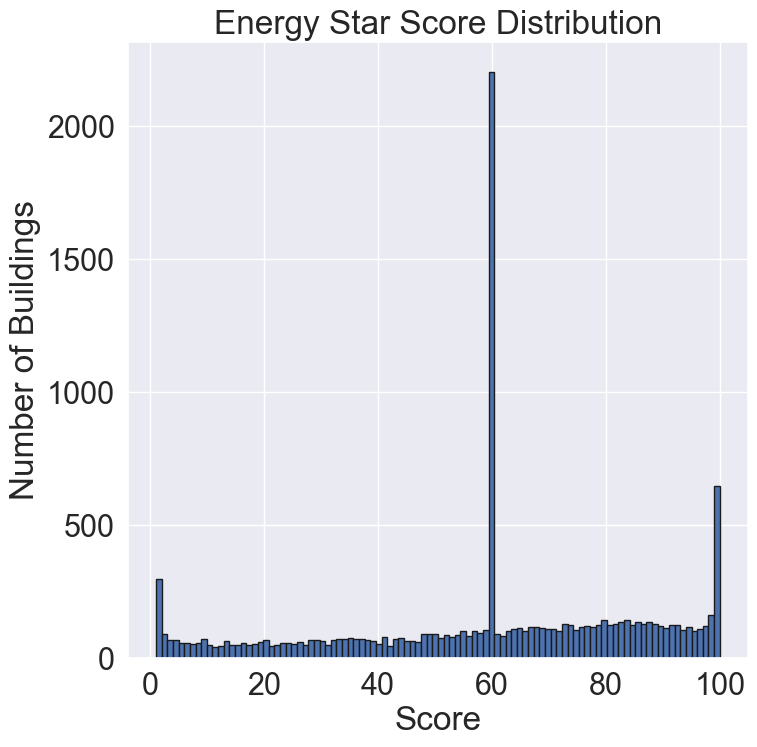

In [30]:
figsize(8, 8)

# Для удобства переименнуем столбец 'ENERGY STAR Score' в 'score' при помощи метода rename
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Построим гистограмму распределения столбца score, воспользовавшись функцией plt.hist, указав число бинов (например) 100
plt.hist(data['score'], bins = 100, edgecolor = 'k')

plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')
plt.style.use('fivethirtyeight')
plt.show()

### Вывод:
#### **Пока выглядит довольно подозрительно!**

Интересующий нас рейтинг представляет собой перцентиль, так что ожидаемо было бы увидеть равномерное распределение, где каждому значению соответствует примерно одинаковое количество зданий. Хотя в нашем случае на лицо диспропорция, больше всего зданий имеют максимальное значение рейтинга — 100, либо минимальное — 1 (высокий рейтинг это хороший показатель).

Обратимся к описанию признака и вспомним, что он основывается на “предоставляемых отчетах об энергопотреблении”. Это, возможно, кое-что объясняет. Просить владельцев зданий отчитаться об эффективности использования электроэнергии, это почти то же самое, что просить поставить студента оценку самому себе на экзамене. В результате мы получаем не самую объективную оценку эффективности использования электроэнергии в зданиях.

Если бы время не было ничем ограничено, стоило бы выяснить, почему большинство зданий имеют слишком высокие или слишком низкие значения рейтинга. Для этого нужно отфильтровать записи по этим зданиям и посмотреть, что у них общего. В нашу задачу не входит изобретение метода новой оценки эффективности энергопотребления, так что лучше сфокусироваться на предсказании рейтинга с тем, что есть.

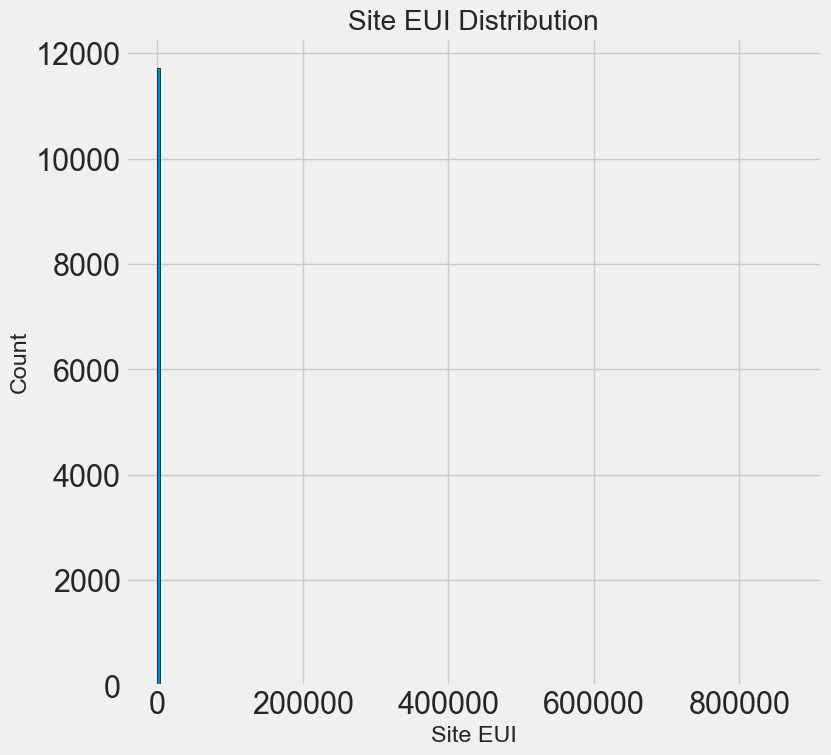

In [31]:
figsize(8, 8)

# Построим гистограмму распределения поля Site EUI, воспользовавшись функцией plt.hist, указав число бинов (например) 200
plt.hist(data['Site EUI (kBtu/ft²)'], bins = 200, edgecolor = 'black')

# Что можно увидеть на ней?

plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()

А здесь мы видим явный выброс!

In [32]:
# Посмотрим на статистики этой же колонки, воспользовавшись методом describe
data['Site EUI (kBtu/ft²)'].describe()

count     11746.000000
mean        280.071484
std        8547.243929
min           0.000000
25%          62.100000
50%          79.000000
75%          98.800000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [33]:
# Посмотрим на топ 10 самых больших значений в этой колонке
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

Посмотрим внимательнее на эти выбросы:

In [34]:
# Выведем строки, значения столбца Site EUI является наибольшим
# Можно ли сделать какие-то выводы касательно этих зданий?

data.loc[data['Site EUI (kBtu/ft²)'] == max(data['Site EUI (kBtu/ft²)']), :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,-1,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,-1,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


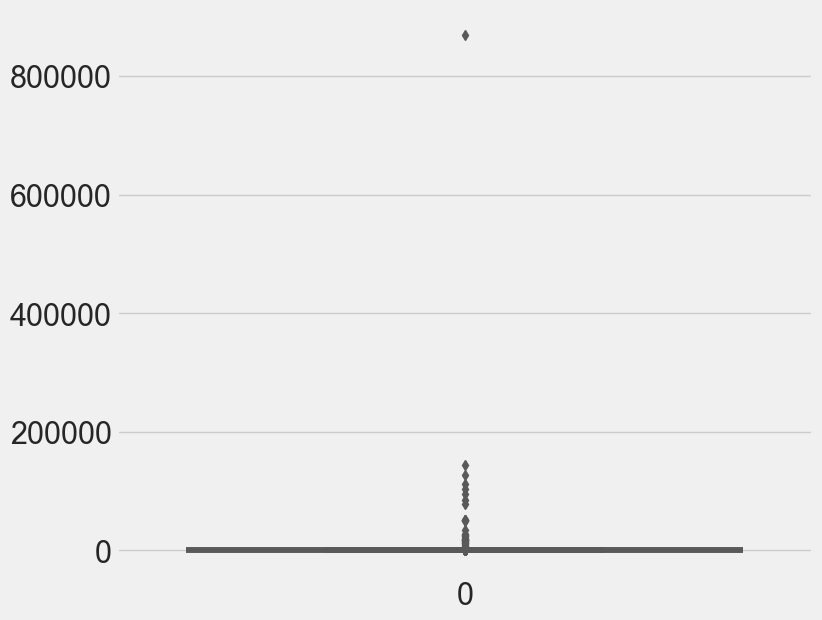

In [35]:
plt.figure(figsize=(8, 7))

# Воспользуемся boxplot-ом из библиотеки seaborn для того, чтобы убедиться, что эти объекты действительно похожы на выбросы
sns.boxplot(data=data['Site EUI (kBtu/ft²)'], palette='Set2')
plt.show()

---

### Reminder: BoxPlot

<img src=https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg width="700">

Box plot --- график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

---

## Убираем выбосы ([Outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm))

Cnоит избавиться от выбросов. Они могут быть связаны с опечатками, ошибками в единицах измерения или являться корректными, но чересчур экстремальными значениями. Удалять выбросы можно разными способами, но один из самых популярных работает по следующей схеме:

- Ниже `первой квартили - 3 $\cdot$ (межквартильное расстояние)`
- Выше `третьей квартили + 3 $\cdot$ (межквартильное расстояние)`

In [36]:
# Рассчитаем первый и третий квантили поля Site EUI или возьмем значения из вывода метода describe
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Рассчитаем IQR как разницу между третьим и первым квантилями
iqr = third_quartile - first_quartile

In [37]:
# Создадим условие на столбец Site EUI для отбора НЕ выбросов, воспользовавшись выражением выше
condition = (data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))
condition

0        False
1        False
2        False
3        False
4        False
         ...  
11741     True
11742     True
11743     True
11744     True
11745     True
Name: Site EUI (kBtu/ft²), Length: 11746, dtype: bool

In [38]:
# Применим созданное условие к нашим данным, отфильтровав тем самым строки, не являющиеся выбросами
data = data[condition]

In [39]:
# Посмотрим какого размера у нас стал датасет
data.shape

(11325, 49)

In [40]:
# Посмотрим на сами данные
data

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,-1,-1,-1,173269.45442,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.000000,32.0,309.747466,7.5,0.0,417.915709,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.000000,51.010000,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
17,20,2777309,Barnard College,2777309,Barnard College,1019890001,1-01989-0001,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,10029,-1,-1,-1,173269.45442,College/University,"College/University, Residence Hall/Dormitory",College/University,323000.0,1907,7,100,Whole Building,-1,59.854594,120.0,125.200000,8.7,0.9,193.600000,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,15917.984063,136.172432,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,-1,-1,-1,173269.45442,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.000000,76.2,79.900000,3.5,0.0,106.200000,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.600000,18.400000,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,40.754379,-73.957057,7.140673,15.771275,4977.596647,-1
19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,-1,67.000000,75.7,79.000000,4.0,0.0,109.100000,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,15917.984063,136.172432,106.6,05/01/2017 10:09:31 PM,-1,In Compliance,40.857943,-73.934962,12.000000,10.000000,281.000000,Washington Heights North ...
20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.00000,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,-1,80.000000,77.1,82.700000,2.6,0.0,102.800000,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,15917.984063,136.172432,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.000000,10.000000,281.00000

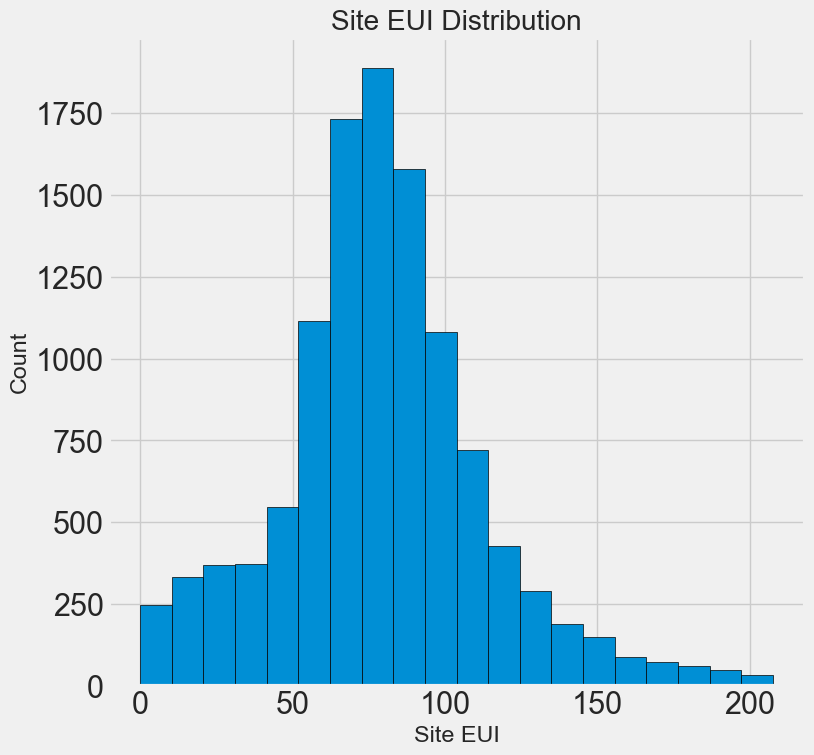

In [41]:
figsize(8, 8)

# Построим еще раз гистограмму распределения поля Site EUI, воспользовавшись функцией plt.hist, указав число бинов (например) 20
plt.hist(data['Site EUI (kBtu/ft²)'], bins = 20, edgecolor = 'black')

plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()

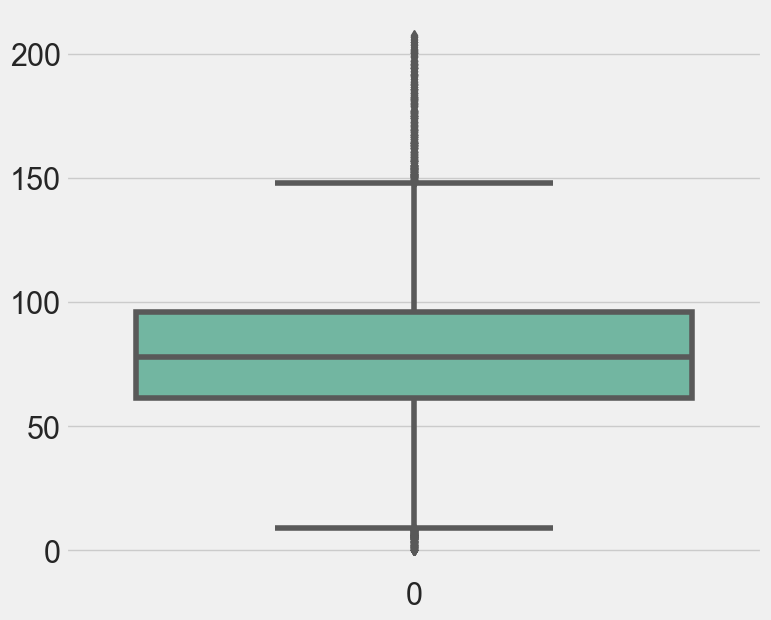

In [42]:
plt.figure(figsize=(8, 7))

# Еще раз Ввоспользуемся boxplot-ом из библиотеки seaborn для того, чтобы убедиться, что выбросы пропали
sns.boxplot(data=data['Site EUI (kBtu/ft²)'].values, palette='Set2')
plt.show()

### Существует множество способов борьбы с выбросами

Мы использовали этот:


- **Dropping the outlier rows with standard deviation**
```
factor = 3
upper_lim = data['column'].mean() + data['column'].std() * factor
lower_lim = data['column'].mean() - data['column'].std() * factor
data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

А могли бы и этот:

- **Dropping the outlier rows with Percentiles**
```
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quantile(.05)
data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]
```

**Примеры других способов:**
- Винсоризация — это серия трансформаций, направленных на ограничения влияния выбросов. 90%-ая винсоризация означает, что мы берём значения меньше 5% перцентиля и выше 95% перцентиля и приравниваем их к значениям на 5-м и 95-м перцентилях соответствиино.
- Триминг - Триминг отличается от винсоризация тем, что мы не ограничиваем крайние значения каким-либо числом, а просто удаляем их.

Больше методов представлено в [(scipy.stats.mstats)](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.mstats.html)


Возвращаемся назад к анализу:)

# В поисках отношений
Значительную часть работы на этапе EDA занимает поиск взаимосвязей между различными признаками. Очевидно что признаки и значения признаков, оказывающие основное влияние на целевой, интересуют нас сильнее, чем прочие, по ним лучше всего и предсказывать значение целевого. Одним из способов оценить влияние значений категориальных признаков (число значений такого признака подразумевается конечным) на целевой — **density plot**, например, используя модуль **seaborn**.

**Density plot** можно представить себе как сглаженную гистограмму, потому что она показывает распределение одного значения категориально признака. Раскрасим распределения разными цветами и посмотрим на распределения. Код ниже строит density plot рейтинга энергопотребления. Разными цветами показаны рейтинги различных типов зданий (рассмотрены типы с как минимум сотней записей в нашем наборе):



In [43]:
# Создадим список types с названиями категорий зданий с более, чем 100 измерениями
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


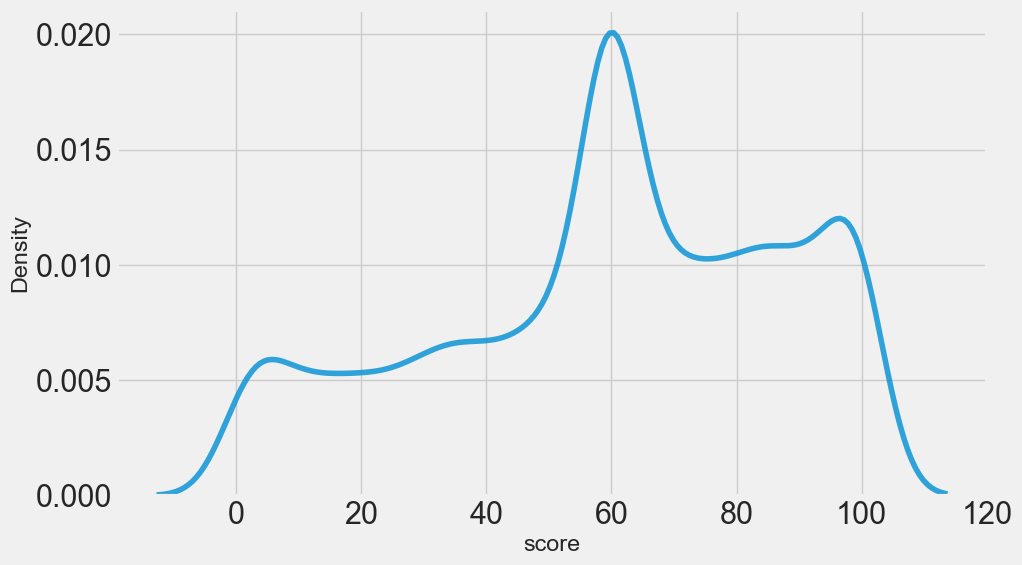

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


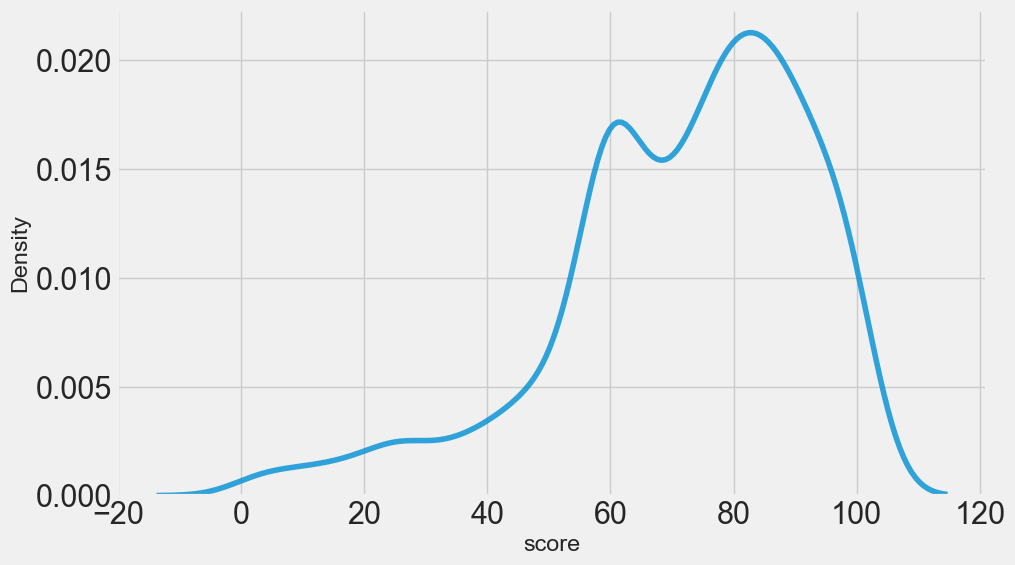

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


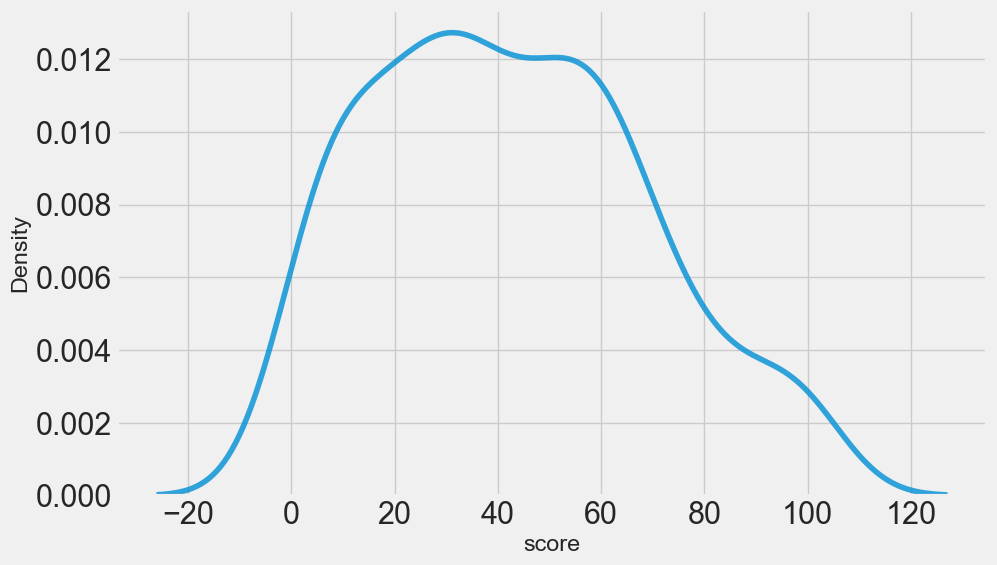

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


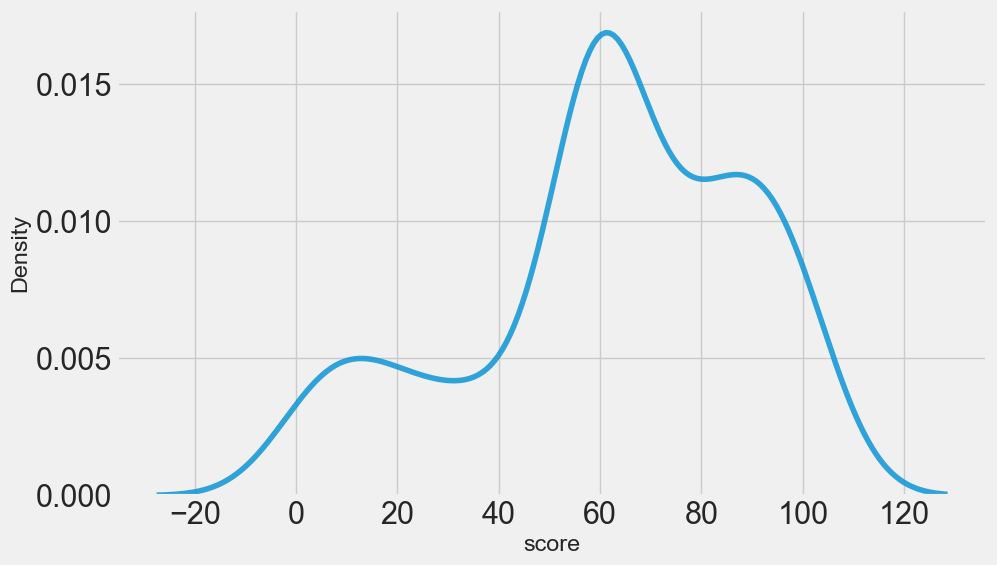

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


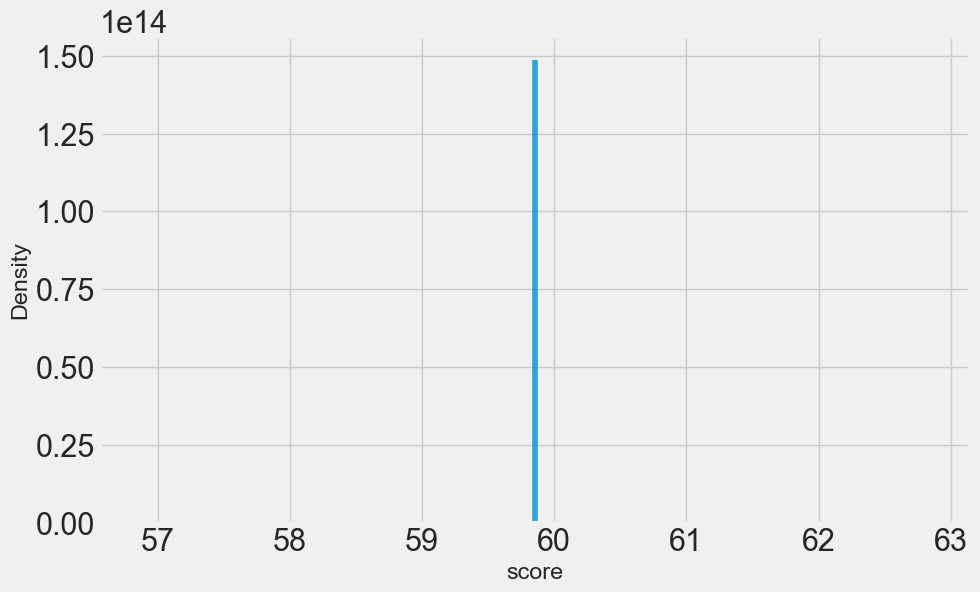

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


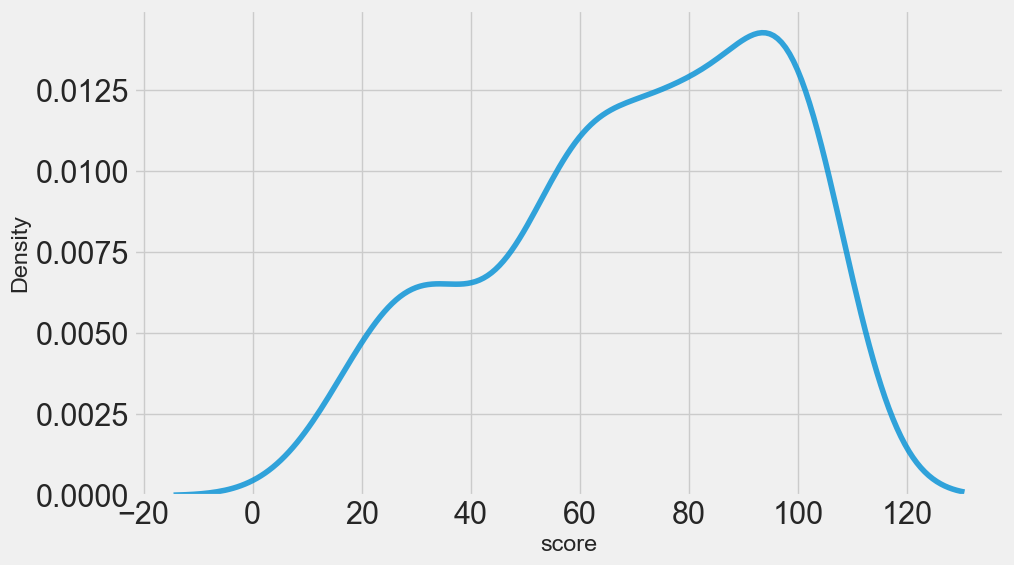

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\4116631393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)


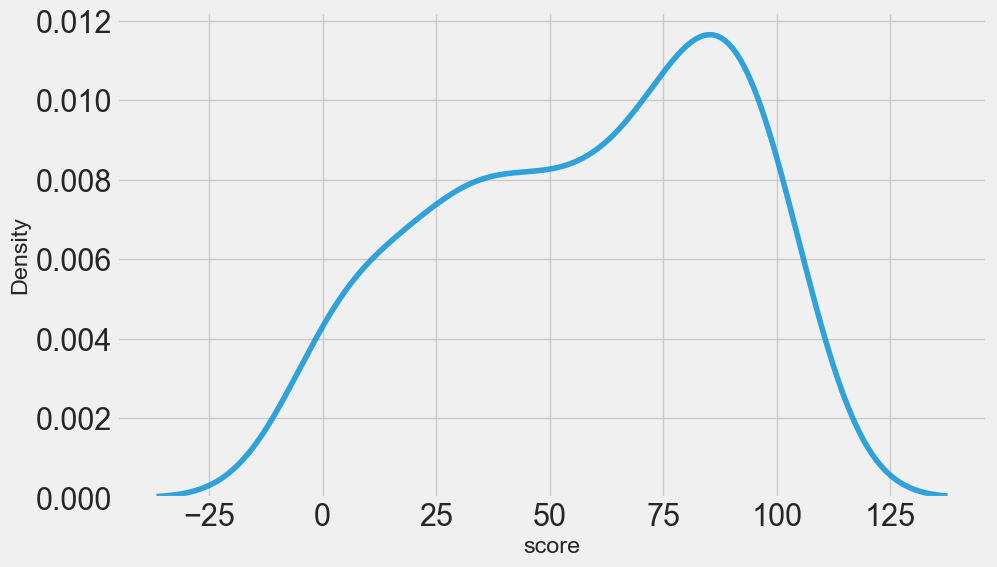

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


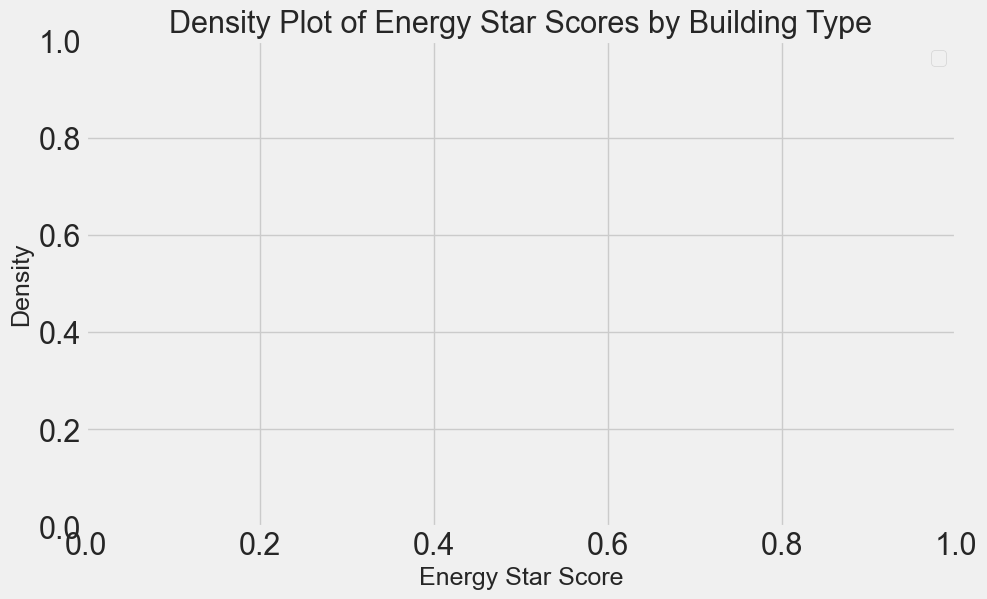

In [44]:
figsize(10, 6)

# Постройте на одном графике распределения оценок для каждого типа зданий из списка types
for b_type in types:
    # Выберете данные одного из типов зданий из списка types
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = b_type, shade = False, alpha = 0.8)
    plt.show()
    
plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 22)
plt.legend(fontsize=14)

Видно, что тип здания оказывает существенное влияние на рейтинг энергопотребления. Здания, используемые как офисы, чаще имеют хороший рейтинг, а отели наоборот. Получается, такой признак, как тип здания, для нас важен. Так как это признак категориальный, нам ещё предстоит выполнить с ним так называемый «one-hot encode».

#### Повторим то же самое посмотрим для различных районов:

In [45]:
# Создадим список boroughs с названиями районов с более, чем 100 измерениями
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

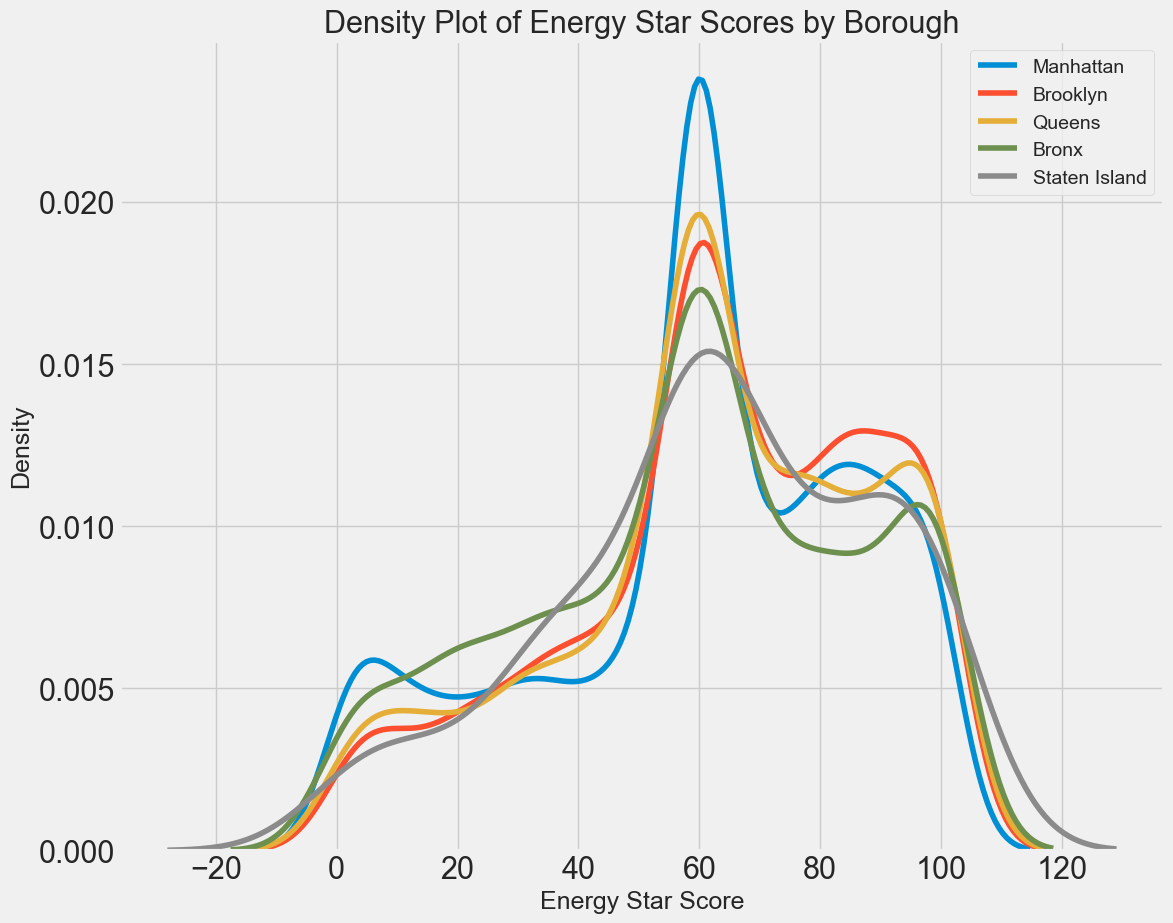

In [46]:
figsize(12, 10)

# Постройте на одном графике распределения оценок для каждого района из списка boroughs
for borough in boroughs:
    # Выберете данные одного из районов из списка boroughs
    subset = data[data['Borough'] == borough]
    
    # Воспользуйтесь функцией kdeplot библиотеки seaborn для отрисовки распределения
    sns.kdeplot(subset['score'], label = borough)

plt.xlabel('Energy Star Score', size = 18)
plt.ylabel('Density', size = 18)
plt.title('Density Plot of Energy Star Scores by Borough', size = 22)
plt.legend(fontsize=14)
plt.show()

Похоже, что район оказывает уже не такое большое влияние. Тем не менее, пожалуй, стоит включить этот признак в модель, так как определенная разница между районами все же есть.

## Корреляции между фичами и целевой переменной

Чтобы численно оценить степень влияния признаков можно использовать [коэффициент корреляции Пирсона](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). 

Это мера степени и положительности линейных связей между двумя переменными.  Значение в +1 означает идеальную пропорциональность между значениями признаков и, соответственно, в -1 аналогично, но с отрицательным коэффициентом.

Несмотря на то что это не дает нам никакого понятия о непропорциональных взаимосвязях, это уже хорошее начало. В Pandas рассчитать величину корреляции довольно легко:

```
# Find all correlations with the score and sort
correlations_data = data.corr()['score'].sort_values()
```

In [47]:
# Воспользуемся методом corr(), выберем столбец с целевой меткой 'score' и отсортируем значения корреляции
correlations_data = data.corr()['score'].sort_values()

# Выведем 15 признаков с наименьшей прямой корреляцией 
print(correlations_data.head(15))

print('------------')

# Выведем 15 признаков с наибольшей прямой корреляцией 
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.632581
Source EUI (kBtu/ft²)                                        -0.551438
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.290951
Weather Normalized Source EUI (kBtu/ft²)                     -0.246809
Weather Normalized Site EUI (kBtu/ft²)                       -0.190641
Direct GHG Emissions (Metric Tons CO2e)                      -0.127582
Year Built                                                   -0.109041
Total GHG Emissions (Metric Tons CO2e)                       -0.096249
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.079944
Electricity Use - Grid Purchase (kBtu)                       -0.043684
Property Id                                                  -0.042415
Latitude                                                     -0.041216
Weather Normalized Site Electricity (kWh)                    -0.039895
Indirect GHG Emissions (Metric Tons CO2e)                    -0.038493
Natura

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\3964496378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = data.corr()['score'].sort_values()


Можно видеть что есть несколько признаков имеющих высокие отрицательные значения коэффициента Пирсона, с самой большой корреляцией для разных категорий EUI (они между собой слегка отличаются по способу расчета). EUI — Energy Use Intensity — это количество использованной энергии, разделенное на площадь помещений в квадратных футах. Значит, чем этот признак ниже, тем лучше. Соответственно: с ростом EUI, рейтинг энергопотребления становится ниже.

C:\Users\commi\AppData\Local\Temp\ipykernel_10592\80277313.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cbar=True, cmap='Blues')


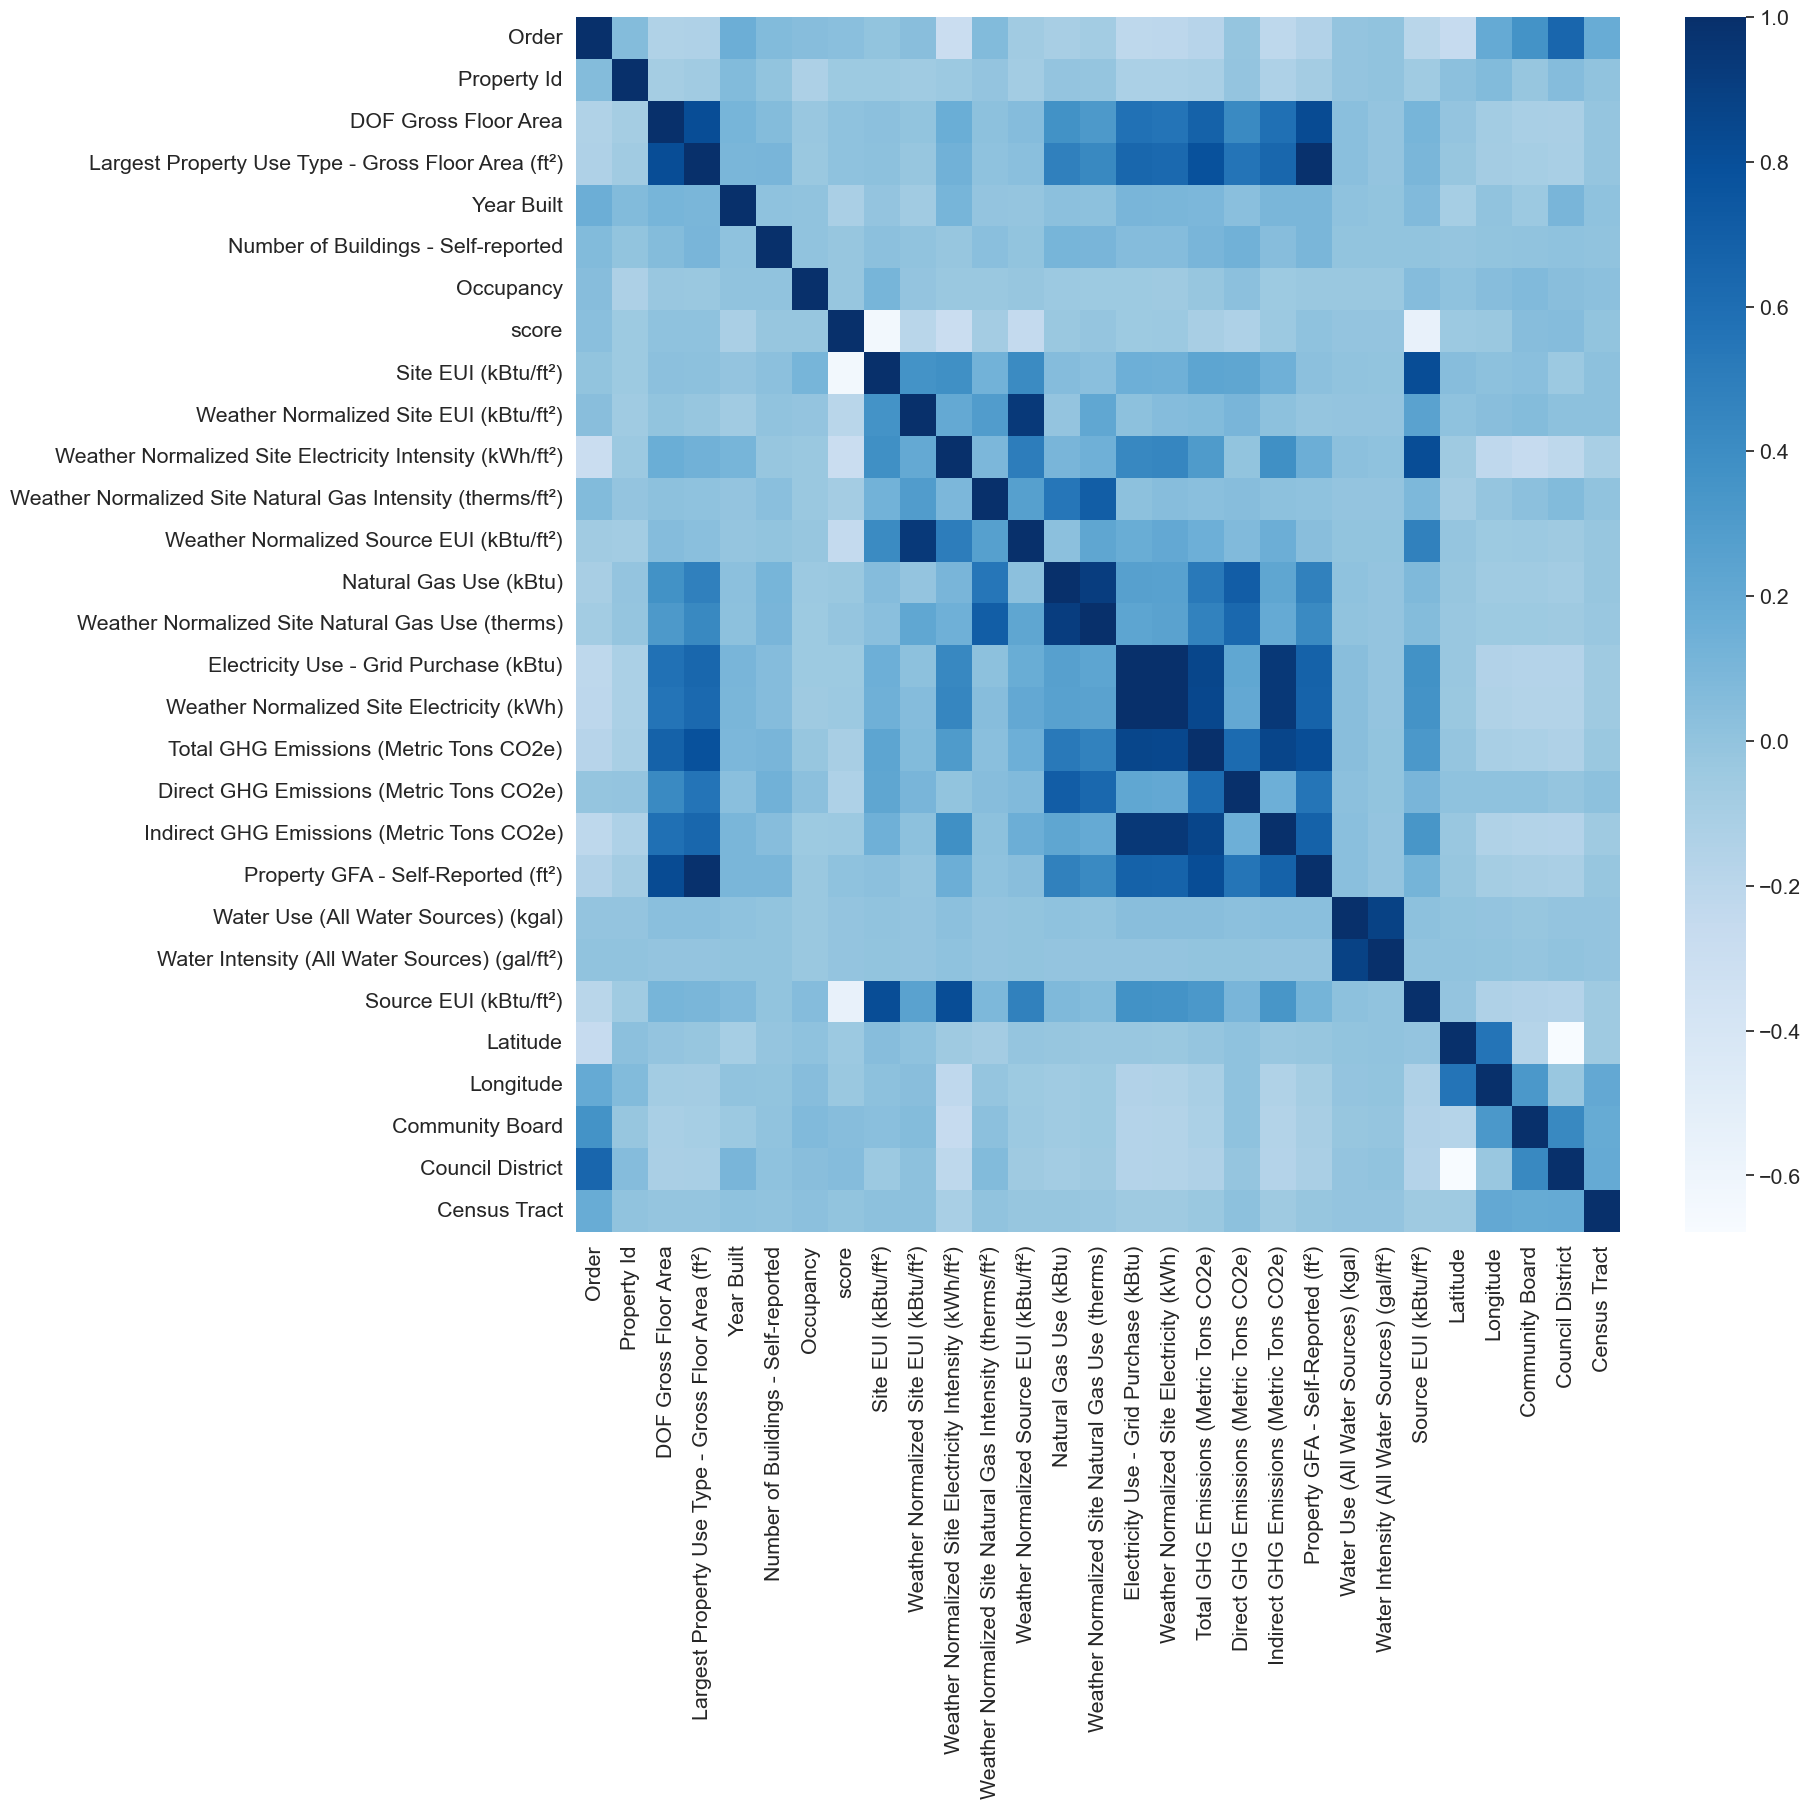

In [48]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))

# Воспользуемся функцией heatmap библиотеки seaborn для отрисовки матрицы корреляции (укажем параметр cbar=True)
sns.heatmap(data.corr(), cbar=True, cmap='Blues')
plt.show()

## Графики от двух переменных (bivariate analysis)
Чтобы посмотреть на связь между двумя непрерывными переменными, можно использовать scatterplots (точечные графики). Дополнительную информацию, такую как значения категориальных признаков, можно показывать различными цветами. Например, график снизу показывает разброс рейтинга энергопотребления в зависимости от величины Site EUI, а разными цветами показаны типы зданий:

In [49]:
# Сделаем копию нашего датасета для того, чтобы не изменить 
features = data.copy()

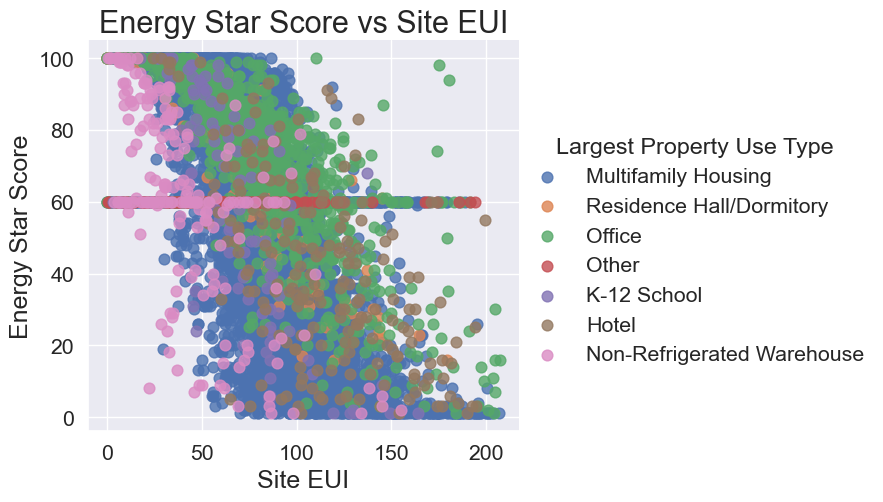

In [52]:
figsize(8, 6)

# Выберем те строки поля с типами зданий, которым соответсвтуют известные значения рейтинга
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Выберем только не строки, которые соответствуют типам зданий, содержащим более 100 записей (.isin(types))
features = features[features['Largest Property Use Type'].isin(types)]

# Воспользуемся функцией lmplot библиотеки seaborn для построения графика scatterplot
# По осям которого будут столбцы score и Site EUI, а точки делятся на группы по типам зданий
sns.lmplot(x='Site EUI (kBtu/ft²)', y='score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          aspect = 1.2)

plt.xlabel('Site EUI', size = 18)
plt.ylabel('Energy Star Score', size = 18)
plt.title('Energy Star Score vs Site EUI', size = 22)
plt.show()

Этот график наглядно демонстрирует, что такое коэффициент корреляции со значением -0.7. Site EUI уменьшается, и рейтинг энергопотребления уверенно возрастает, независимо от типа здания.

## Pairs plot
Ну и наконец, построим Pairs Plot. Это мощный исследовательский инструмент, он позволяет взглянуть на взаимосвязи сразу между несколькими признаками одновременно, а так же на их распределение. В примере при построении использовался модуль seaborn и функция PairGrid. Построен Pairs Plot со scatterplots выше главной диагонали, гистограммами на главной диагонали и 2D kernel density plots, с указанием корреляции, ниже главной диагонали.

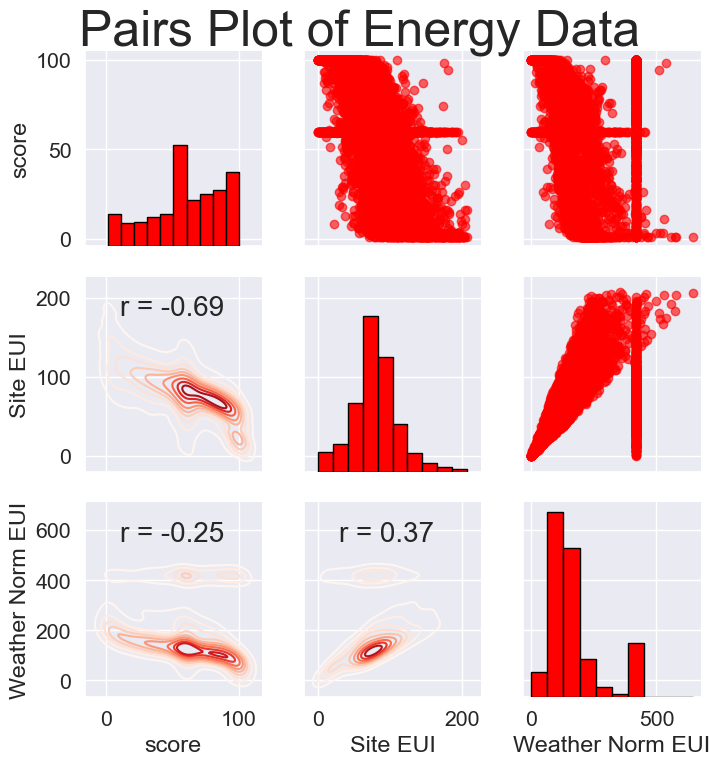

In [54]:
# Выберем колонки, на которые мы будем смотреть в попарном разрезе
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)']]

# Заменим бесконечности на np.nan при помощи функции replace
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Для удобства переименнуем колонки
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Удалим пропущенные значения
plot_data = plot_data.dropna()

# Воспользуемся следующей функцией для подсчета корреляции между двумя векторами
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Создадим объект PairGrid и настроим в нем отображение графиков
grid = sns.PairGrid(data = plot_data)

# Если интересно, за что отвечает каждый метод, то можно их потыкать
# и посмотреть как меняется результат
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02)
plt.show()

Чтобы посмотреть на интересующие нас отношения между величинами, ищем пересечения строк и колонок. Например, чтобы взглянуть на корреляцию между Weather Norm EUI со score, смотрим на строку Weather Norm EUI  и колонку score. Видно, что коэффициент Пирсона равен -0.67. Помимо того, что график красиво выглядит, он ещё может помочь понять, какие признаки стоит включить в нашу модель.


# Выбор и создание новых признаков
Выбор и создание новых признаков зачастую оказывается одним из самых «благодарных» занятий по соотношению усилия/вклад в результат. Для начала, пожалуй, поясню что это такое:

* __[Создание новых признаков, Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__: процесс, при котором берутся данные, как они есть, и затем на основе имеющихся данных конструируются новые признаки. Это может означать изменение непосредственно самих значений, например логарифмирование, взятие корня, или one—hot encoding категориальных признаков, для того чтобы модель могла эти признаки обработать. Иногда это создание совершенно новых признаков, которые раньше явным образом в данных не содержались, но, в общем, это всегда добавление в набор новых признаков, полученных из первоначальных данных.

* __[Выбор признаков, Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__: процесс выбора наиболее релевантных признаков. При этом из набора удаляются признаки, для того чтобы модель уделила больше внимания и ресурсов первостепенным признакам, а также это помогает получить более легкоинтерпретируемые результаты. В общем, это чистка набора, при которой остаются только наиболее важные для нашей задачи данные.

В машинном обучении модель обучается целиком на данных, которые мы подаем на вход модели, поэтому важно быть уверенным в том, что все ключевые данные для эффективного решения задачи у нас есть. Если данных, способных обеспечить нам решение задачи у нас нет, то какой бы модель ни была хорошей, научить мы её ничему не сможем.

На данном этапе я выполнил следующую последовательность действий:

* One-hot кодирование категориальные признаков (район и тип здания);
* Логарифмирование числовых данных.

[One-hot кодирование](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) необходимо выполнить для того, чтобы модель могла учесть категориальные признаки. Модель не сможет понять, что имеется ввиду, когда указано, что здание используется как “офис”. Нужно создать новый соответствующий признак и присвоить ему значение 1, если данная запись содержит сведения об офисе и 0 в противном случае.

При применении различных математических функций к значениям в наборе модель способна распознать не только линейные связи между признаками. [Взятие корня, логарифмирование, возведение в степень и т.д.](https://datascience.stackexchange.com/questions/21650/feature-transformation-on-input-data) — распространенная в науке о данных практика, и она может основываться на наших представлениях о поведении и связях между признаками, а так же просто на эмпирических сведениях о том, при каких условиях модель работает лучше. В данном случае я, как уже упоминалось, решил взять натуральный логарифм от всех числовых признаков.

Приведенный ниже код этим и занимается: логарифмирует числовые признаки, а также выделяет два упомянутых категориальных признака и применяет к ним one-hot кодирование. Затем объединяет полученные при этом наборы. Звучит довольно утомительно, но Pandas позволяет это проделать относительно легко.

In [ ]:
# Сделаем копию наших данных
features = data.copy()

# Выделим числовые признаки из датасета при помощи функции select_dtypes
numeric_subset = data.select_dtypes('number')

# Добавим столбцы, получающиеся из колонок из numeric_subset, путем взятия натурального логарифма
# Назовем их 'log_<ИМЯ СТОЛБЦА>'
for col in numeric_subset.columns:
    if col == 'score':
        # Пропустим целевой столбец
        continue
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Выберем категориальные признаки ('Borough' и 'Largest Property Use Type')
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# Воспользуемся функцией get_dummies библиотеки pandas для того, чтобы примернить OHE к категориальным колонкам
categorical_subset = pd.get_dummies(categorical_subset)

# Соединим числовые признаки и категориальные
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Посмотрим какого размера у нас получился датасет
features.shape

В итоге в нашем наборе теперь всё ещё 11,000 записей (зданий) и 110 колонок (признаков). Не все эти признаки одинаково важны для нашей задачи, так что перейдем к следующему шагу.

# Выбор признаков
Многие из 110 признаков для нашей модели избыточны, т.к. некоторые из них сильно коррелируют. 


## Удаляем коллинеарные признаки

[Коллинеарные признаки](http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html) имеют высокое значение корреляции.
Например, зависимость Site EUI от Weather Normalized Site EUI, которая имеют коэффициент корреляции 0.997.

In [ ]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])
plt.show()

Признаки, которые сильно коррелированны, называют [коллинеарными](https://en.wikipedia.org/wiki/Multicollinearity), и достаточно оставить один из таких признаков, чтобы помочь алгоритму лучше обобщать и получать более интерпретируемые результаты на выходе (на всякий случай уточню, что речь идет о признаках коррелированных между собой, а не с целевым признаком, последние очень даже помогают нашему алгоритму.)

Есть много способов поиска коллинеарных признаков, например, один из широко используемых — расчет коэффициента увеличения дисперсии. Сам я решил использовать так называемый thebcorrelation коэффициент. Один из двух признаков будет автоматически удален если коэффициент корреляции для этой пары выше 0.6.

Выбор именно такого порога может показаться необоснованным, но он был установлен опытным путем, при решении этой конкретной задачи. Машинное обучение наука в значительной степени экспериментальная и зачастую сводится к произвольному поиску лучших параметров безо всякого обоснования.  В итоге оставим всего  64 признака и один целевой.

In [ ]:
# Отрисуем матрицу корреляции для наших новых признаков при помощи heatmap

sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, cmap='Blues')
plt.show()

In [ ]:
# Воспользуемся следующей функцией для того, что избавиться от сильно скоррелированных признаков

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Удалит коллинеарные признаки в dataframe с коэффициентом корреляции, превышающим пороговое значение.
        Удаление коллинеарных функций может помочь модели обобщить и улучшить интерпретируемость модели,
        а также позвоялет избавить от бесполезных с точки зрения информации признаков
        
    Inputs: 
        x: исходная матрица признаков
        threshold: любые объекты с корреляциями выше этого значения удаляются
    
    Output: 
        dataframe который содержит только слабо коллинеарные признаки
    '''
    
    # Не хотим удалять корреляцию между Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Вычисляем матрицу корреляции
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Проходим по всей матрице и сравниваем корреляции
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Если корреляция превышает порог, то добавляем кандидата на удаление
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Удаляем один из двух скоррелированных признака
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    x['score'] = y
               
    return x

In [ ]:
# Воспользуемся написанноый выше функцией, чтобы удалить сильно скоррелированные признаки
features = remove_collinear_features(features, 0.8);

In [ ]:
# Удалим колокни, которые содержат в себе только пропуски (dropna(axis=1, how='all'))
features = features.dropna(axis=1, how = 'all')
features.shape

In [ ]:
# После всех проведенных нами махинаций отрисуем еще раз матрицу корреляции
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(features.corr(), cbar=True, cmap='Blues')
plt.show()

#### Дополнительный Feature Selection

Существует множество типов [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html). Самый популярный: [principal components analysis (PCA)](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) который преобразует функции в уменьшенное количество измерений, которые сохраняют наибольшую вариативность, или [independent components analysis (ICA)](http://cs229.stanford.edu/notes/cs229-notes11.pdf) который стремится найти независимые источники в наборе фичей. Хотя эти методы эффективны для уменьшения количества признаков, они создают новые признаки, которые не имеют физического смысла и, следовательно, делают интерпретацию модели практически невозможной.

Эти методы очень полезны для работы с многомерными данными, и я советую к прочтению[ источник](https://machinelearningmastery.com/feature-selection-machine-learning-python/) 